# Stylized Facts Check

### Dependencies

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from observers import acf_mean_sd, kurtosis_t_test
from scipy.optimize import curve_fit
from scipy.stats import skew, ttest_1samp

pic_save_dir = os.path.join(os.getcwd(), 'stylized_facts_plots')

## MC Simulated Price

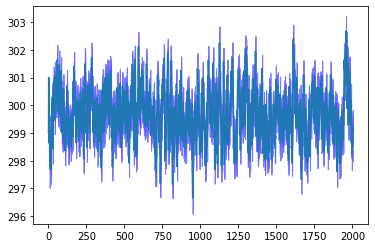

In [46]:
price_series = np.load(os.path.join('stylized_facts', 'data', 'prices.npy'))
price_means = np.mean(price_series, axis=0)
price_sds = np.std(price_series, axis=0, ddof=1)
ci = 1.96 * price_sds/np.sqrt(len(price_means))
fig, ax = plt.subplots()
ax.plot(range(1, price_series.shape[1] + 1), price_means)
ax.fill_between(range(1, price_series.shape[1] + 1), (price_means - ci), (price_means + ci), color='b', alpha=.5)
plt.show()

## Calculate returns

MC Returns:

In [47]:
mc_rets = []
for i in range(price_series.shape[0]):
    mc_rets.append(np.log(price_series[i, 1:]) - np.log(price_series[i, :-1]))
mc_rets = np.array(mc_rets)
print(mc_rets.shape)

(200, 2002)


Aggregational Returns

In [48]:
agg_prices = np.load(os.path.join('stylized_facts', 'data', 'aggregation_prices.npy'))
agg_ret = np.log(agg_prices[1:]) - np.log(agg_prices[:-1])
agg_ret.shape

(20002,)

## Absence of Autocorrelation

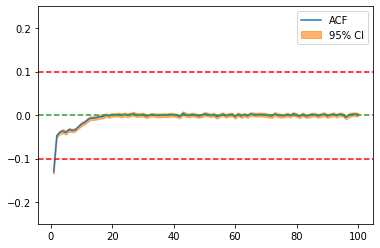

In [14]:
acf_mean, acf_sd = acf_mean_sd(mc_rets)
ci = 1.96 * acf_sd / np.sqrt(len(acf_mean))
fig, ax = plt.subplots()
ax.plot(range(1, 101), acf_mean[1:], label='ACF')
ax.fill_between(range(1, 101), (acf_mean - ci)[1:], (acf_mean + ci)[1:], color='#ff7f0e', alpha=0.6, label = '95% CI')
ax.axhline(y=0.1, color='r', linestyle='--')
ax.axhline(y=-0.1, color='r', linestyle='--')
ax.axhline(y=0.00, color='#2ca02c', linestyle='--')
plt.ylim([-0.25, 0.25])
plt.legend()
plt.savefig(os.path.join(pic_save_dir, 'absence_auto.png'), dpi=1200)
plt.show()

## Aggregational Gaussianity

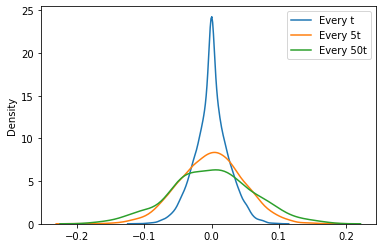

In [9]:
fig, ax = plt.subplots()
sns.kdeplot(agg_ret, label="Every t")
price_5 = agg_prices[::5]
agg_ret_5 = np.log(price_5[1:]) - np.log(price_5[:-1])
sns.kdeplot(agg_ret_5, label="Every 5t")
price_50 = agg_prices[::50]
agg_ret_50 = np.log(price_50[1:]) - np.log(price_50[:-1])
sns.kdeplot(agg_ret_50, label="Every 50t")
plt.legend()
plt.savefig(os.path.join(pic_save_dir, 'ag_gaussianity.png'), dpi=1200)
plt.show()

## Fat Tail Distribution of Returns

In [15]:
print(kurtosis_t_test(mc_rets))

(Ttest_1sampResult(statistic=57.26233805500084, pvalue=6.878525408318899e-126), array([3.88372394, 3.85218709, 3.54408422, 3.91498944, 3.98387843,
       4.1335952 , 3.57663187, 3.69824931, 3.47714058, 3.53292034,
       4.31057131, 3.62178149, 3.81159681, 4.32750525, 3.80925731,
       3.8093652 , 3.95065315, 3.50496817, 3.72477423, 3.77953898,
       3.65206582, 3.95191478, 3.84834737, 3.61787141, 3.8197548 ,
       3.79607841, 3.6262266 , 3.71291197, 3.95188598, 3.67559252,
       3.45164321, 3.78474562, 3.80043331, 3.45674988, 4.12019244,
       3.65785478, 3.74869806, 3.32162588, 3.67843373, 3.91790843,
       3.84848653, 3.89692363, 3.70939514, 3.62769209, 3.48567782,
       3.83173257, 3.50130793, 3.73743949, 3.40572167, 3.47630822,
       3.80799792, 3.97829013, 3.83329064, 3.64447031, 3.7079369 ,
       3.62832827, 3.92971951, 3.77676937, 3.68520702, 4.06270829,
       4.11392011, 3.73634858, 3.70934819, 3.58136992, 3.72165798,
       4.00600129, 3.59794299, 3.69141668, 3.8763

In [16]:
_, kurtosis_values = kurtosis_t_test(mc_rets)

In [17]:
np.mean(kurtosis_values)

3.7655798064251997

In [18]:
np.std(kurtosis_values, ddof=1)

0.18907599341919157

In [19]:
import pandas as pd
kurtosis_values_df = np.round(kurtosis_values, 2)
splited_reuslt = np.array_split(kurtosis_values, 20)
result_df = pd.DataFrame(splited_reuslt)
result_df = result_df.round(decimals=4)
print(result_df)
result_df.to_csv(os.path.join(pic_save_dir, 'kurtosis_values.csv'))

         0       1       2       3       4       5       6       7       8  \
0   3.8837  3.8522  3.5441  3.9150  3.9839  4.1336  3.5766  3.6982  3.4771   
1   4.3106  3.6218  3.8116  4.3275  3.8093  3.8094  3.9507  3.5050  3.7248   
2   3.6521  3.9519  3.8483  3.6179  3.8198  3.7961  3.6262  3.7129  3.9519   
3   3.4516  3.7847  3.8004  3.4567  4.1202  3.6579  3.7487  3.3216  3.6784   
4   3.8485  3.8969  3.7094  3.6277  3.4857  3.8317  3.5013  3.7374  3.4057   
5   3.8080  3.9783  3.8333  3.6445  3.7079  3.6283  3.9297  3.7768  3.6852   
6   4.1139  3.7363  3.7093  3.5814  3.7217  4.0060  3.5979  3.6914  3.8763   
7   3.7793  3.8003  3.6228  3.8444  3.5670  3.7676  3.5116  3.8394  3.7120   
8   3.8394  3.5123  3.7261  3.2846  3.2685  3.6692  3.7756  3.7110  3.6751   
9   3.8308  3.7734  4.2260  4.0012  3.9308  3.4505  3.8239  4.0309  3.4985   
10  3.6899  3.8956  3.8556  3.8717  4.0389  3.8467  3.7675  3.6403  3.6279   
11  3.6894  3.5110  3.6339  3.8454  3.9864  3.7500  4.0790  3.80

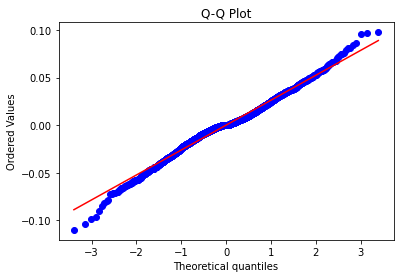

In [53]:
stats.probplot(mc_rets[3, :], dist="norm", plot=pylab)
plt.title('Q-Q Plot')
pylab.savefig(os.path.join(pic_save_dir, 'Fat_tailed.png'), dpi=1200)
pylab.show()

## Volatility Clustering

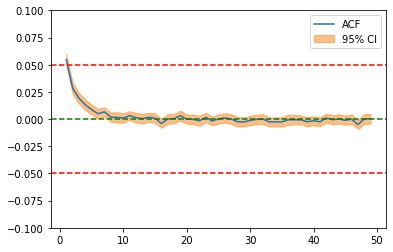

In [26]:
mc_rets_square = np.power(mc_rets, 2)
acf_mean, acf_sd = acf_mean_sd(mc_rets_square)
ci = 1.96 * acf_sd / np.sqrt(len(acf_mean))
fig, ax = plt.subplots()
ax.plot(range(1, 50), acf_mean[1:50], label='ACF')
ax.fill_between(range(1, 50), (acf_mean - ci)[1:50], (acf_mean + ci)[1:50], color='#ff7f0e', alpha=.5, label = '95% CI')
ax.axhline(y=0.05, color='r', linestyle='--')
ax.axhline(y=-0.05, color='r', linestyle='--')
ax.axhline(y=0.00, color='g', linestyle='--')
plt.ylim([-0.1, 0.1])
plt.legend()
plt.savefig(os.path.join(pic_save_dir, 'vol_clustering.png'), dpi=1200)
plt.show()

In [27]:
np.argmax(acf_mean < 0.0)

16

## Slow Decay of Autocorrelation in Absolute Returns

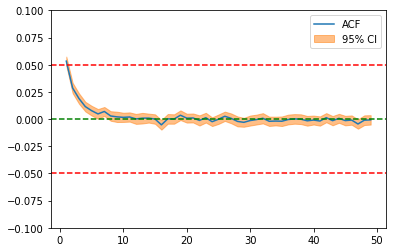

In [29]:
mc_rets_abs = np.abs(mc_rets)
acf_mean, acf_sd = acf_mean_sd(mc_rets_abs)
ci = 1.96 * acf_sd / np.sqrt(len(acf_mean))
fig, ax = plt.subplots()
ax.plot(range(1, 50), acf_mean[1:50], label='ACF')
ax.fill_between(range(1, 50), (acf_mean - ci)[1:50], (acf_mean + ci)[1:50], color='#ff7f0e', alpha=.5, label='95% CI')
ax.axhline(y=0.05, color='r', linestyle='--')
ax.axhline(y=-0.05, color='r', linestyle='--')
ax.axhline(y=0.00, color='g', linestyle='--')
plt.ylim([-0.1, 0.1])
plt.legend()
plt.show()

Power Law Form:  
$$ac = k l^a$$

In [30]:
def power_law(x, a, k):
    return k * np.power(x, a)

popt, pcov = curve_fit(power_law, np.array(range(1, 101)), acf_mean[1:])

In [31]:
popt

array([-1.29320798,  0.05617801])

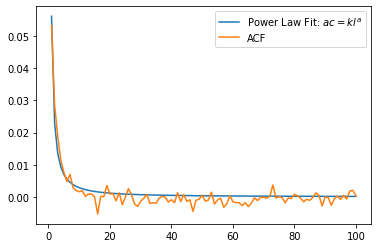

In [32]:
# plt.plot(np.array(range(1, 101)), acf_mean[1:], label = "ACF")
plt.plot(np.array(range(1, 101)), power_law(np.array(range(1, 101)), *popt), label = r"Power Law Fit: $ac = kl^a$")
plt.plot(np.array(range(1, 101)), acf_mean[1:], label = "ACF")
plt.legend()
plt.savefig(os.path.join(pic_save_dir, 'slow_decay.png'), dpi=1200)
plt.show()

## Gain/loss asymmetry:

In [33]:
skewness = skew(mc_rets, axis=1)
ttest_1samp(skewness, popmean=0.0, alternative='less')

Ttest_1sampResult(statistic=-13.160645695410642, pvalue=3.6135426885871713e-29)

In [34]:
np.mean(skewness)

-0.06395801565998563

In [36]:
np.std(skewness, ddof=1)

0.06872785367997875

In [37]:
skewness

array([-2.45016368e-02, -6.78698091e-02, -2.35910328e-02, -1.26843763e-01,
       -4.82632463e-02, -6.48922647e-02, -9.92435168e-03, -3.88868382e-02,
       -8.08031442e-02,  1.88215115e-02,  5.29415930e-02, -4.98602395e-03,
       -3.90601715e-02, -9.81054912e-02, -1.33523439e-01, -5.42725749e-03,
        9.33780812e-02, -3.48075430e-02, -2.41418102e-03, -7.16474798e-02,
       -6.84236954e-02, -6.24966056e-02, -7.34677739e-02, -2.20571466e-02,
       -8.32674935e-03, -2.70587938e-02, -7.46846768e-02, -1.24795775e-01,
       -2.43518547e-02, -1.19573593e-01, -1.16318910e-01,  6.50488973e-03,
       -1.33985420e-01, -1.11259637e-01,  1.96325126e-02,  5.17380005e-03,
       -9.76696505e-02, -5.37979974e-02,  3.68923033e-02, -1.86506082e-01,
       -1.87382155e-01, -1.76186375e-01, -8.42376662e-02,  5.20758779e-02,
       -7.83234863e-02, -2.07237942e-02, -1.24419084e-01, -7.19182690e-02,
       -1.40738558e-02, -1.04093701e-01, -8.24005837e-02, -6.62766278e-02,
        9.73470095e-02, -

In [38]:
import pandas as pd
splited_reuslt = np.array_split(skewness, 20)
result_df = pd.DataFrame(splited_reuslt)
result_df = result_df.round(decimals=4)
print(result_df)
result_df.to_csv(os.path.join(pic_save_dir, 'skewness_values.csv'))

         0       1       2       3       4       5       6       7       8  \
0  -0.0245 -0.0679 -0.0236 -0.1268 -0.0483 -0.0649 -0.0099 -0.0389 -0.0808   
1   0.0529 -0.0050 -0.0391 -0.0981 -0.1335 -0.0054  0.0934 -0.0348 -0.0024   
2  -0.0684 -0.0625 -0.0735 -0.0221 -0.0083 -0.0271 -0.0747 -0.1248 -0.0244   
3  -0.1163  0.0065 -0.1340 -0.1113  0.0196  0.0052 -0.0977 -0.0538  0.0369   
4  -0.1874 -0.1762 -0.0842  0.0521 -0.0783 -0.0207 -0.1244 -0.0719 -0.0141   
5  -0.0824 -0.0663  0.0973 -0.0781 -0.0860  0.0224 -0.0321 -0.1228 -0.0652   
6  -0.1383 -0.0486 -0.0830 -0.0409 -0.0604 -0.2692 -0.1721 -0.0090 -0.0500   
7  -0.1254 -0.0479 -0.0911 -0.1527  0.0217  0.0427 -0.0325 -0.0336 -0.0247   
8  -0.1674 -0.0597 -0.0812 -0.0515 -0.0278  0.0521 -0.0828 -0.1493 -0.1493   
9   0.0192  0.0423 -0.1365 -0.0277 -0.2025  0.0232  0.0237 -0.0432 -0.0922   
10 -0.1114 -0.1095 -0.0152 -0.1534 -0.1182 -0.0612  0.0034  0.0163 -0.0768   
11 -0.1685  0.0002 -0.0211 -0.0806 -0.0889 -0.0458  0.0113 -0.06

## Leverage effect:

In [39]:
mc_rets_squared = np.power(mc_rets, 2)

def correlation_k_interval(a, b, k):
    if k == 0:
        return np.corrcoef(a, b)[0, 1]
    else:
        return np.corrcoef(a[k:], b[:-k])[0, 1]

def correlation_nlags(a, b, nlags):
    return np.array([correlation_k_interval(a, b, k) for k in range(0, nlags)])

def leverage_effect_test(rets_squred, rets, nlags):
    result = [
        correlation_nlags(rets_squred[i, :], rets[i, :], nlags)
        for i in range(rets_squred.shape[0])
    ]
    result = np.array(result)
    
    return np.mean(result, axis=0), np.std(result, axis=0)

In [40]:
results, std_val = leverage_effect_test(mc_rets_squared, mc_rets, nlags=20)

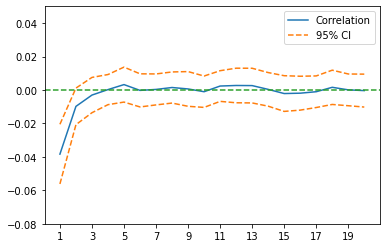

In [44]:
from matplotlib.ticker import MaxNLocator

plt.plot(np.array(range(1, 21)), results, label = "Correlation")
ci = 1.96 * std_val / np.sqrt(len(results))
plt.plot(range(1, 21), (results - ci)[:], color='#ff7f0e', linestyle='--', label='95% CI')
plt.plot(range(1, 21), (results + ci)[:], color='#ff7f0e', linestyle='--')
plt.axhline(y=0.00, color='#2ca02c', linestyle='--')
plt.ylim([-0.08, 0.05])
plt.xticks(range(1, 20, 2))
plt.legend()
plt.savefig(os.path.join(pic_save_dir, 'leverage.png'), dpi=1200)
plt.show()

In [42]:
np.argmax(results > 0.0)

3

In [43]:
results[0]

-0.0383430505804059